In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/data_ml/data_mining_p2/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Tiền xử lý dữ liệu

In [4]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Tìm hiểu xem các cột có kiểu dữ liệu gì ?

In [5]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Nhận thấy cột `id` và cột `Unnamed` không có tác dụng cho việc phân loại nên em sẽ xoá cột này đi. `diagnosis` dạng categorical em sẽ chuyển về dạng numeric sau. Các cột dữ liệu còn lại đều có kiểu numeric.

In [6]:
data = data.drop(['id', 'Unnamed: 32'], axis=1)

Biến cần phân lớp (target variable) ở đây là biến `diagnosis`, biến có 2 giá trị M = malignant, B = benign có dạng categorical , để có thể áp dụng được mô hình học máy thì cần chuyển về dạng numeric. Em sẽ chuyển giá trị `M` thành `1` và giá trị `B` thành `0`.

In [7]:
data['diagnosis'] = data['diagnosis'].apply(lambda dn: 1 if dn == 'M' else 0)

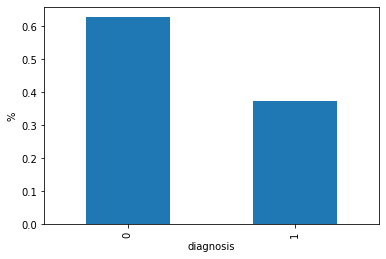

In [8]:
# Tỷ lệ các lớp trong tập nhãn.
data.diagnosis.value_counts(normalize=True).plot(kind="bar")
data['diagnosis'].value_counts(normalize=True) * 100
plt.xlabel('diagnosis')
plt.ylabel('%');

Tỷ lệ lớp `0` nhiều hơn so với lớp `1` nhưng nhìn chung mọi thứ vẫn ổn vì không bị lệch quá nhiều.

In [9]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Để có cái nhìn trực quan hơn về những cột dữ liệu trên thì em sẽ trực quan tính tương quan giữa các biến dữ liệu.

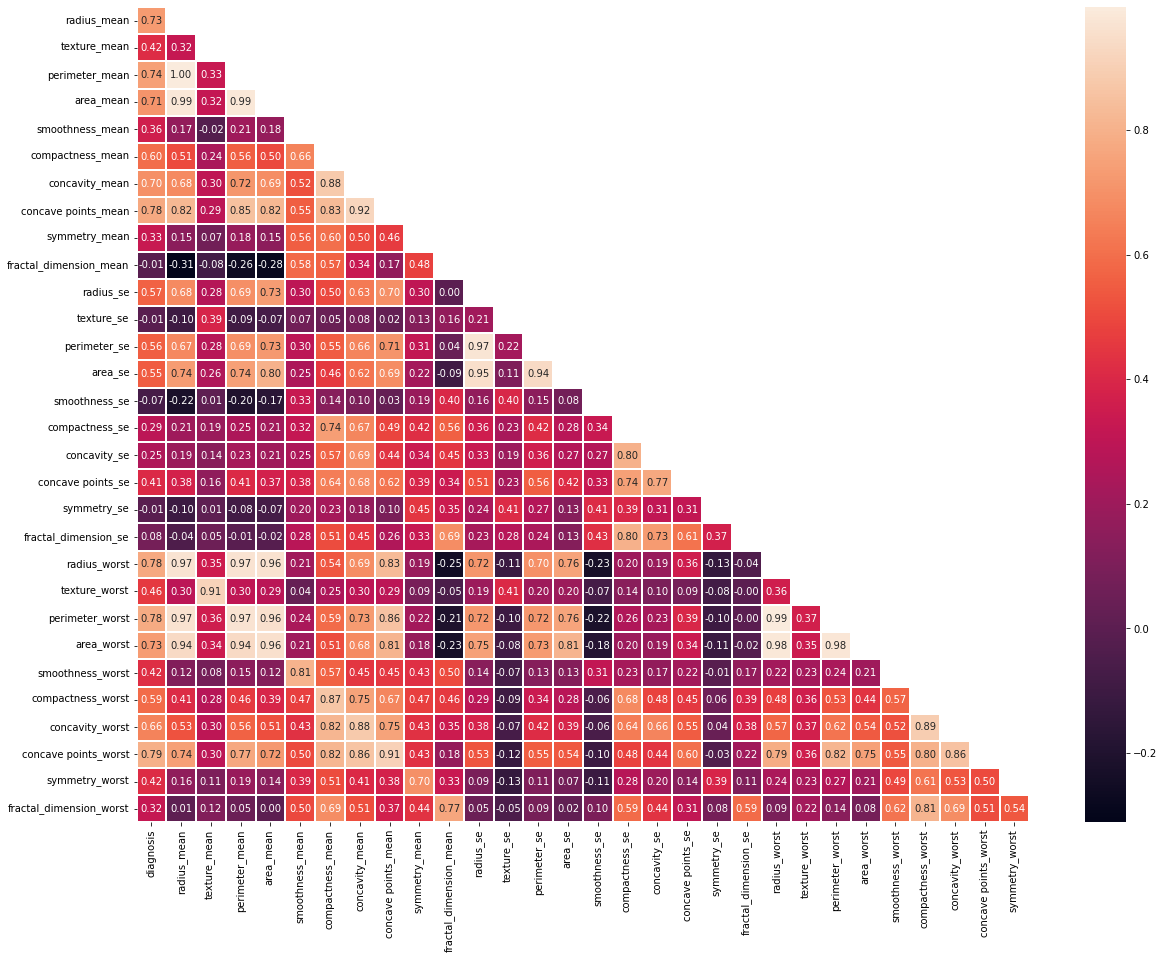

In [10]:
mask = np.triu(np.ones_like(data.corr(), dtype = bool))
plt.figure(figsize=(20,15))
sn.heatmap(data=data.corr().iloc[1:, :-1], mask=mask[1:, :-1], linewidths = 1, annot = True, fmt = ".2f");

Em có một vài nhận xét về biểu đồ này: 
- Có nhiều cặp biến có độ tương quan rất cao. Có thể thấy những cặp biến có độ tương quan > 0.9. VD: `perimeter_mean` và `perimeter_worst` có độ tương quan 0.97, và còn rất nhiều cặp biến như vậy.
- Khi có nhiều biến tương quan như vậy sẽ dẫn đến hiện tượng suy diễn thống kê không chắc chắn, giảm độ chính xác của mô hình. Nên em sẽ xoá đi khi có độ tương quan lớn hơn 0.9.
- Thật sự thì độ tương quan bao nhiêu là cao thì em không biết chắc, em chọn 0.9 vì đây là con số phổ biến mà nhiều bài toán vẫn sử dụng.

In [11]:
corr_matrix = data.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

dropped_feature = [x for x in tri_df.columns if any(tri_df[x] > 0.9)]
data = data.drop(dropped_feature, axis = 1)

In [12]:
# Kiểm tra xem dữ liệu hiện tại còn bao nhiêu cột
data.shape

(569, 21)

Dữ liệu từ 33 cột sau một vài bước từ bỏ những cột không cần thiết và loại bỏ các cột tương quan cao (> 0.9) thì dữ liệu hiện tại bao gồm 21 cột (bao gồm 1 cột nhãn). Chúng ta sẽ khám phá xem những cột còn lại là những cột gì

In [13]:
data.columns

Index(['diagnosis', 'smoothness_mean', 'compactness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Em sẽ chia `data` thành 2 tập train và test

In [14]:
from sklearn.model_selection import train_test_split
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Trước khi sử dụng dữ liệu trên cho quá trình train thì em sẽ chuẩn hoá trước. Dùng `StandardScaler` để chuẩn hoá về phân phối chuẩn

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Vì đây là bài toán phân loại nhị phân nên em sẽ dùng mô hình phân loại nhị phân cơ bản `Decision Tree Classifier` trước để có một `base model`

In [16]:
from sklearn.tree import DecisionTreeClassifier

lr_model = DecisionTreeClassifier()
lr_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Nhãn được dự đoán từ mô hình vừa huấn luyện
y_pred = lr_model.predict(X_test)

# Một vài metrics để đánh giá mô hình trên tập test

# Độ chính xác trên tập train
print(f'Độ chính xác: (Trên tập huấn luyện) {accuracy_score(y_train, lr_model.predict(X_train))}')


# Độ chính xác trên tập test
print(f'Độ chính xác: (Trên tập kiểm thử) {accuracy_score(y_test, y_pred)}')
print()
# Confusion matrix để xem rõ hơn về việc dự đoán đúng sai của mô hình
print(confusion_matrix(y_test, y_pred))


Độ chính xác: (Trên tập huấn luyện) 1.0
Độ chính xác: (Trên tập kiểm thử) 0.9385964912280702

[[61  6]
 [ 1 46]]


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95        67
           1       0.88      0.98      0.93        47

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



Nhìn qua những chỉ số đánh giá trên có thể dễ dàng nhận thấy chỉ sử dụng mô hình đơn giản `Decision Tree Classifier` vẫn cho kết quả dự đoán rất cao, tất cả chỉ số `precision`, `recall` và `f1-score` đều cao >= 0.85. Độ chính xác trên tập test đạt 92%

Nhìn chung đây là tập dữ liệu chưa đủ lớn để có thể kết luận, em sẽ đánh giá mô hình này bằng K-Fold Cross Validation để đánh giá mô hình trên đầy đủ và chính xác hơn với tập dữ liệu nhỏ.

In [19]:
from sklearn.model_selection import KFold
def eval_kfold(model, X, y, splits=3):
  # Khởi tạo kfold
  kfold = KFold(n_splits=splits)

  fold_idx = 1
  sum_acc = 0
  for train_ids, val_ids in kfold.split(X_fold, y):

    model = model
    # Train model
    model.fit(X_fold[train_ids], y[train_ids])

    # Test và in kết quả
    scores = model.score(X_fold[val_ids], y[val_ids])
    print(f'Độ chính xác mô hình trên tập train: {model.score(X_fold[train_ids], y[train_ids])}')
    print(f'Độ chính xác mô hình trên tập validation: {scores}')
    print("Đã train xong Fold ", fold_idx)
    sum_acc += scores
    # Sang Fold tiếp theo
    fold_idx = fold_idx + 1
  print(f'Độ chính xác trung bình sau {fold_idx-1} lần là: {sum_acc/(fold_idx-1)}')

In [20]:
X_fold = scaler.transform(X)
model = DecisionTreeClassifier()
eval_kfold(model, X_fold, y)

Độ chính xác mô hình trên tập train: 1.0
Độ chính xác mô hình trên tập validation: 0.9105263157894737
Đã train xong Fold  1
Độ chính xác mô hình trên tập train: 1.0
Độ chính xác mô hình trên tập validation: 0.9421052631578948
Đã train xong Fold  2
Độ chính xác mô hình trên tập train: 1.0
Độ chính xác mô hình trên tập validation: 0.8783068783068783
Đã train xong Fold  3
Độ chính xác trung bình sau 3 lần là: 0.9103128190847488


Độ chính xác trung bình sau 3 lần test chỉ là 0.9. Em sẽ thử thêm 1 mô hình khác, em dùng `Random Forest Classifier` vì mô hình này tổng hợp nhiều Decision Tree nên thuật toán này có thể sẽ cho kết quả tốt hơn.

In [21]:
from sklearn.ensemble import RandomForestClassifier
# random forest model
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
eval_kfold(rf_model, X_fold, y)

Độ chính xác mô hình trên tập train: 1.0
Độ chính xác mô hình trên tập validation: 0.9157894736842105
Đã train xong Fold  1
Độ chính xác mô hình trên tập train: 1.0
Độ chính xác mô hình trên tập validation: 0.9789473684210527
Đã train xong Fold  2
Độ chính xác mô hình trên tập train: 1.0
Độ chính xác mô hình trên tập validation: 0.9682539682539683
Đã train xong Fold  3
Độ chính xác trung bình sau 3 lần là: 0.9543302701197439


Độ chính xác trung bình đã tăng lên 95% và ở tập thứ 2 lên tới 98%, em nghĩ đây là mô hình có tiềm năng nền dùng `GridSearch` để tìm siêu tham số cho mô hình này.

Quá trình tìm những siêu tham số cho random forest có thể mất vài chục phút

In [41]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 120, 140, 160]
max_depth = [5, 10, 13]
min_samples_split = [2, 3, 4]
min_samples_leaf = [2, 3, 4] 
criterion = ['gini', 'entropy']
rfc_model = RandomForestClassifier()
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf,
              criterion = criterion)

gridF = GridSearchCV(rfc_model, hyperF, cv = 3, verbose = 10, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [42]:
best_rf = bestF.best_estimator_
bestF.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 160}

In [43]:
eval_kfold(best_rf, X_fold, y)

Độ chính xác mô hình trên tập train: 0.9973614775725593
Độ chính xác mô hình trên tập validation: 0.9105263157894737
Đã train xong Fold  1
Độ chính xác mô hình trên tập train: 0.9947229551451188
Độ chính xác mô hình trên tập validation: 0.9789473684210527
Đã train xong Fold  2
Độ chính xác mô hình trên tập train: 0.9947368421052631
Độ chính xác mô hình trên tập validation: 0.9682539682539683
Đã train xong Fold  3
Độ chính xác trung bình sau 3 lần là: 0.9525758841548315


Nhận thấy khi sử dụng mô hình random forest sẽ cho được độ chính xác trung bình trên cả 3 tập cao hơn (95%).